In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Visadataset.csv")

In [77]:
df.head(15)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [4]:
df.shape

(25480, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
# Pie chart for the no of employees from different continents

In [10]:
df1 = df.groupby(df['continent'])['no_of_employees'].sum()

In [11]:
df1

continent
Africa            3811891
Asia             89605599
Europe           24122041
North America    21708853
Oceania            789239
South America     4358638
Name: no_of_employees, dtype: int64

<AxesSubplot:ylabel='no_of_employees'>

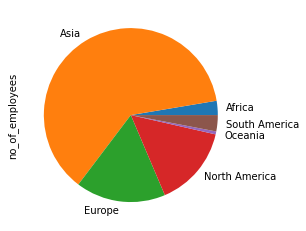

In [12]:
df1.plot.pie()

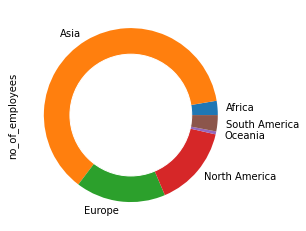

In [13]:
# using Donut chart
df1.plot.pie()
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

<AxesSubplot:xlabel='continent'>

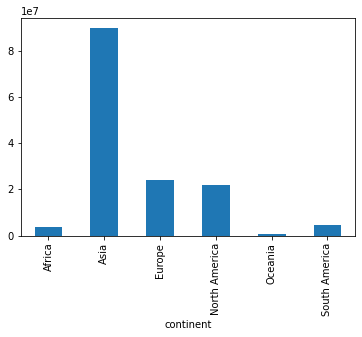

In [15]:
# using Bar chart
df1.plot.bar()

In [16]:
# No of Education of Employees in continents

In [22]:
df2 = df.groupby(df['continent']).sum({'education_of_employee':["Bachelor's'","Doctorate","Master's'","High School"]})

In [23]:
df2

,no_of_employees,yr_of_estab,prevailing_wage
continent,,,
Africa,3811891,1089526,4.266168e+07
Asia,89605599,33390458,1.341175e+09
Europe,24122041,7379854,2.233338e+08
North America,21708853,6513479,2.240743e+08
Oceania,789239,379783,1.459090e+07
South America,4358638,1682265,5.129856e+07


In [24]:
result = df.groupby(['continent','education_of_employee'])['education_of_employee'].count()

In [25]:
result

continent      education_of_employee
Africa         Bachelor's                143
               Doctorate                  54
               High School                66
               Master's                  288
Asia           Bachelor's               7168
               Doctorate                 923
               High School              2290
               Master's                 6480
Europe         Bachelor's               1299
               Doctorate                 846
               High School               490
               Master's                 1097
North America  Bachelor's               1225
               Doctorate                 258
               High School               401
               Master's                 1408
Oceania        Bachelor's                 66
               Doctorate                  22
               High School                36
               Master's                   68
South America  Bachelor's                333
               Doc

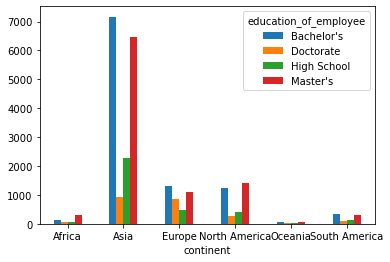

In [32]:
crosstb = pd.crosstab(df.continent, df.education_of_employee)
a = crosstb.plot(kind='bar', rot=0)

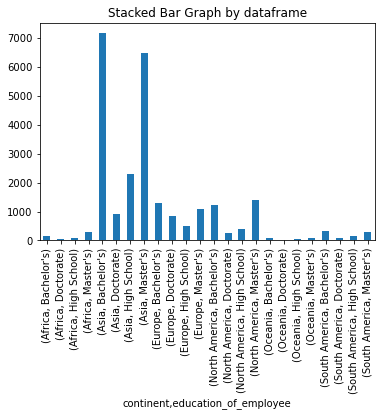

In [47]:
result.plot(x='education_of_employee', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

In [57]:
# Case status according to continenets
df2 = df.groupby(['continent','case_status'])['case_status'].count()

In [58]:
df2

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: case_status, dtype: int64

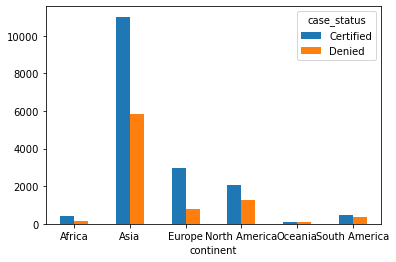

In [59]:
crosstb = pd.crosstab(df.continent, df.case_status)
a = crosstb.plot(kind='bar', rot=0)

In [66]:
df3 = df.groupby(['education_of_employee'])['no_of_employees'].sum()

In [67]:
df3

education_of_employee
Bachelor's     52871340
Doctorate      14962484
High School    16982171
Master's       59580266
Name: no_of_employees, dtype: int64

<AxesSubplot:ylabel='education_of_employee'>

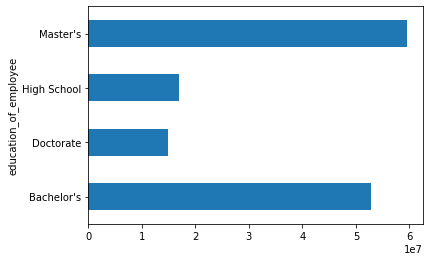

In [70]:
df3.plot.barh()

In [73]:
df4 = df.groupby(['region_of_employment'])['prevailing_wage'].sum()

In [74]:
df4

region_of_employment
Island       3.439228e+07
Midwest      3.949379e+08
Northeast    4.883438e+08
South        5.195425e+08
West         4.599177e+08
Name: prevailing_wage, dtype: float64

<AxesSubplot:xlabel='region_of_employment'>

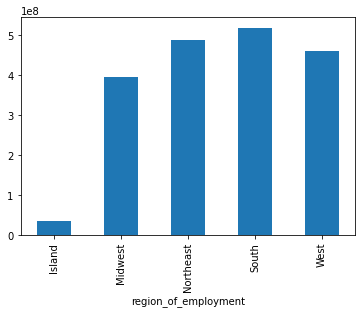

In [75]:
df4.plot.bar()

<AxesSubplot:>

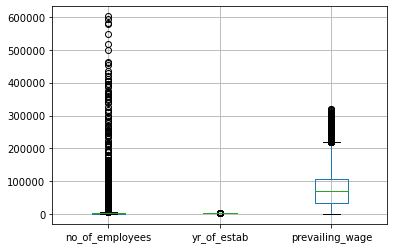

In [76]:
df.boxplot()

<AxesSubplot:xlabel='yr_of_estab', ylabel='prevailing_wage'>

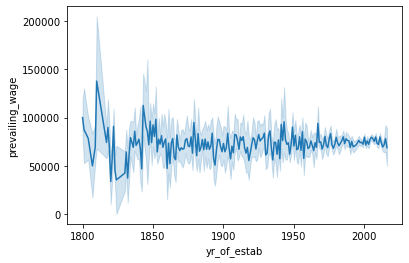

In [82]:
sns.lineplot(x='yr_of_estab', y='prevailing_wage', data=df)

<AxesSubplot:xlabel='continent', ylabel='prevailing_wage'>

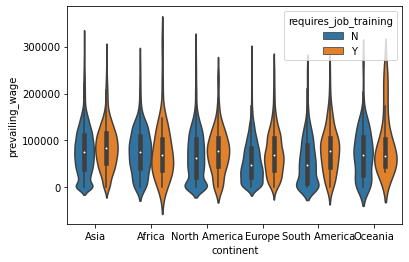

In [116]:
sns.violinplot(x ="continent",
             y ="prevailing_wage",
             data = df, hue="requires_job_training",size=7)

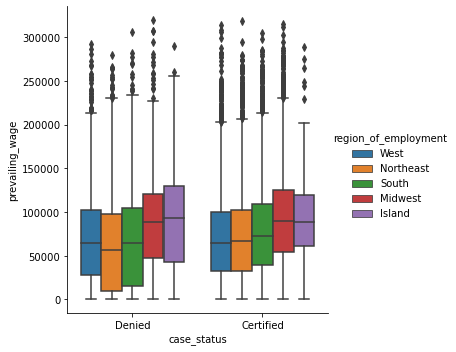

In [96]:
sns.catplot(data=df, x="case_status", y="prevailing_wage", kind="box", hue="region_of_employment")

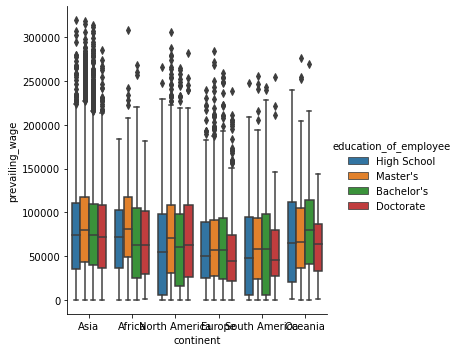

In [97]:
sns.catplot(data=df, x="continent", y="prevailing_wage", kind="box", hue="education_of_employee")

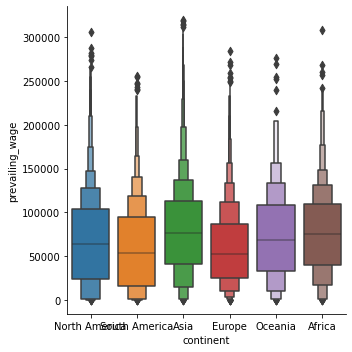

In [98]:
sns.catplot(
    data=df.sort_values("prevailing_wage"),
    x="continent", y="prevailing_wage", kind="boxen",
)